In [60]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import mplfinance as mpf
import matplotlib.dates as mdates

In [61]:
# setting custom choices
style.use('ggplot')
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

In [62]:
# grabbing TSLA stock data from yahoo
df = web.DataReader('TSLA', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


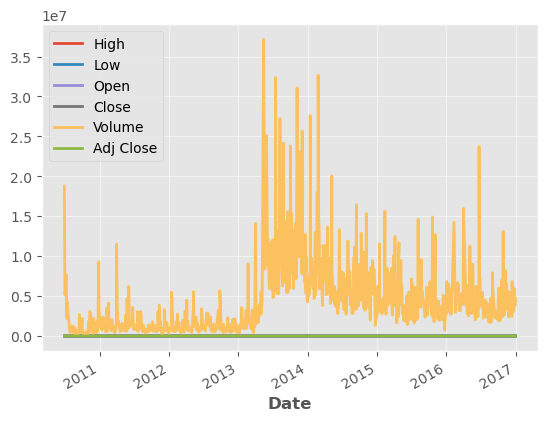

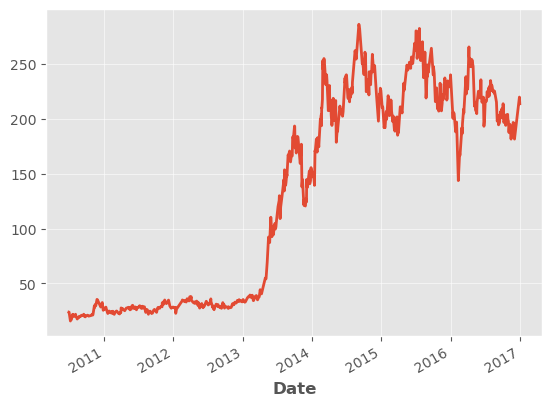

In [63]:
# this plot is generated using the pandas dataframe, making the task easier
df.plot() # has all columns, but volume is most prominent visually
plt.show()
df['Adj Close'].plot()
plt.show()

In [64]:
# create a 100 day moving average column
df['100ma'] = df['Adj Close'].rolling(window=100).mean()

In [65]:
# resetting index of the df and adding date column in proper format
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

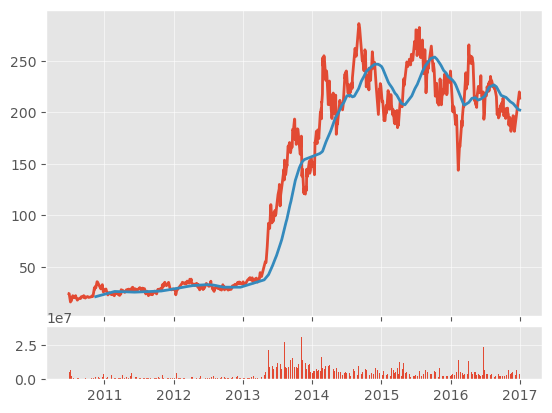

In [66]:
# This is an example of standalone matplotlib graph, created not using pandas

# plots are referred to as axes
# grid size = 6 rows, 1 column
# start point = 0,0
# .plot simply plots a line
# can also add line color and label

ax1 = plt.subplot2grid((6, 1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()


In [67]:
df_ohlc = df['Adj Close'].resample('10D').ohlc() # can use mean or sum as well
df_volume = df['Volume'].resample('10D').sum() # can use mean or sum as well

In [68]:
# filtering by date for candlestick plot
dt_range = pd.date_range(start="2016-03-01", end="2016-03-31")
df2 = df[df.index.isin(dt_range)]

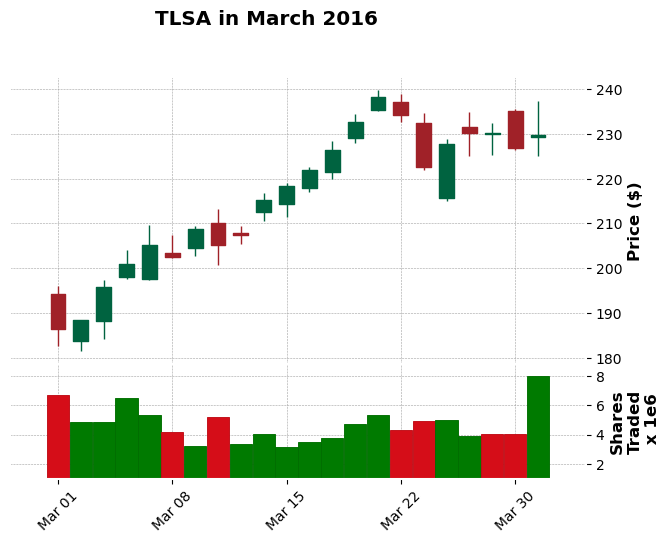

In [69]:
# candlestick plot
mpf.plot(df2, 
type='candle',
style='charles',
volume=True, 
title='TLSA in March 2016', 
ylabel='Price ($)',
ylabel_lower='Shares\nTraded')